(-2.079308203540266,
 10.857805234822267,
 -2.6377979529036137,
 6.478887662038507)

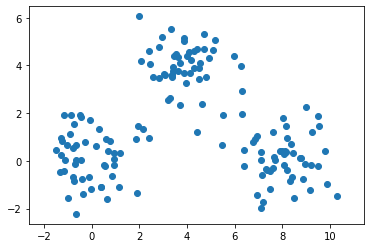

In [80]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import KDTree # We'll use this later
 
np.random.seed(0)

N = 150
X = np.random.randn(N, 2)
X[0:50] += np.array([8, 0])
X[100::] += np.array([4, 4])
 
plt.scatter(X[:, 0], X[:, 1])
plt.axis("equal")

In [81]:
def get_dist(c1, c2):
    """
    Get the euclidian distance between two coordinates.
    
    Parameters:
    c1, c2: (np.array 1xn) coordinate in n-dimensional space
    
    Return:
    dist: (float) euclidian distance between c1 and c2
    """
    dist = np.linalg.norm(c1 - c2)
    return dist
    
def get_clusters(X, centers):
    clusters = [list() for i in range(len(centers))]

    for x in X:
        dists = np.zeros(len(centers))
        
        for i, center in enumerate(centers):
            dists[i] = get_dist(x, center)

        clusters[np.argmin(dists)].append(x)
        
    for k in range(len(clusters)):
        clusters[k] = np.array(clusters[k])
        
    return clusters

def get_centers(clusters):
    centers = list()
    
    for idx, cluster in enumerate(clusters):
        dim = len(cluster[0])
        center = np.zeros(dim)
        
        for i in range(dim):
            center[i] = np.mean([coor[i] for coor in cluster])
            
        centers.append(center)
    return centers

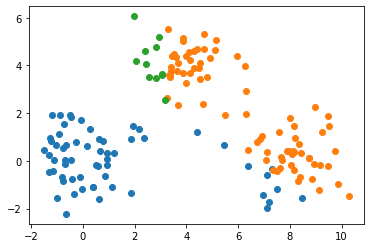

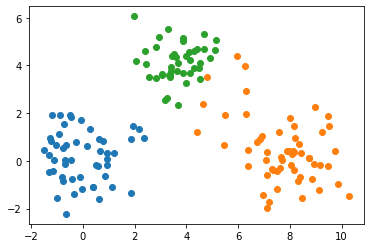

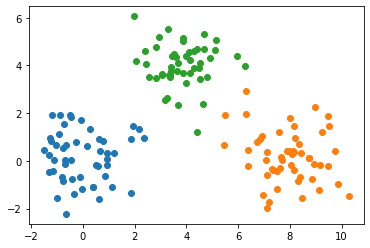

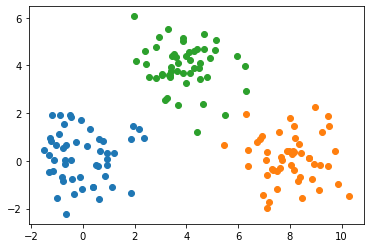

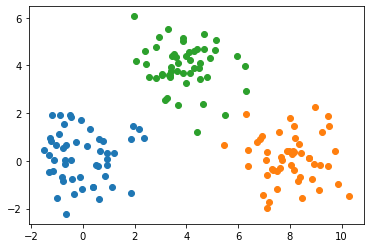

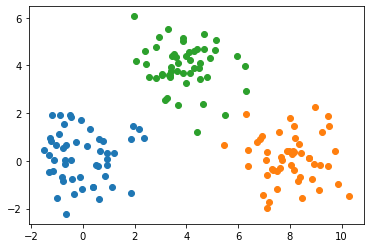

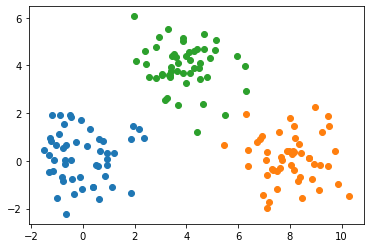

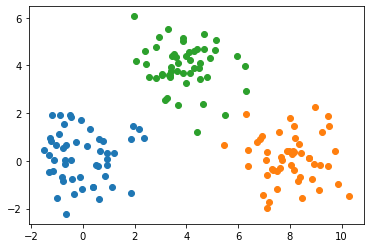

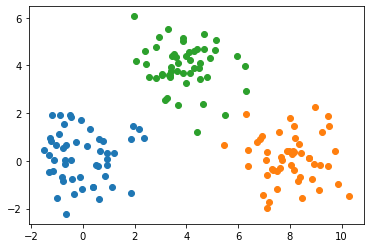

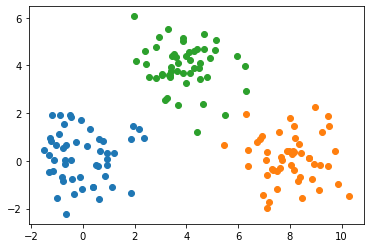

In [90]:
import random
K = 3
n_iters = 10

centers = np.random.permutation(X)[0:K]
clusters = get_clusters(X, centers)

for i in range(n_iters):
    fig = plt.figure()
    for cluster in clusters:
        plt.scatter(cluster[:,0], cluster[:,1])
    centers = get_centers(clusters)
    clusters = get_clusters(X, centers)
